In [13]:
import numpy as np
from logr_model import logistic_regression_predict
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load and prepare the data
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(f"Dataset dimensions: {train_samples} train samples, {n_features} features, {n_classes} classes")

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

Dataset dimensions: 14134 train samples, 130107 features, 20 classes


Accuracy (scikit-learn): 0.8145161290322581
Precision (macro) (scikit-learn): 0.8158888929005789
Recall (macro) (scikit-learn): 0.8044466870033388


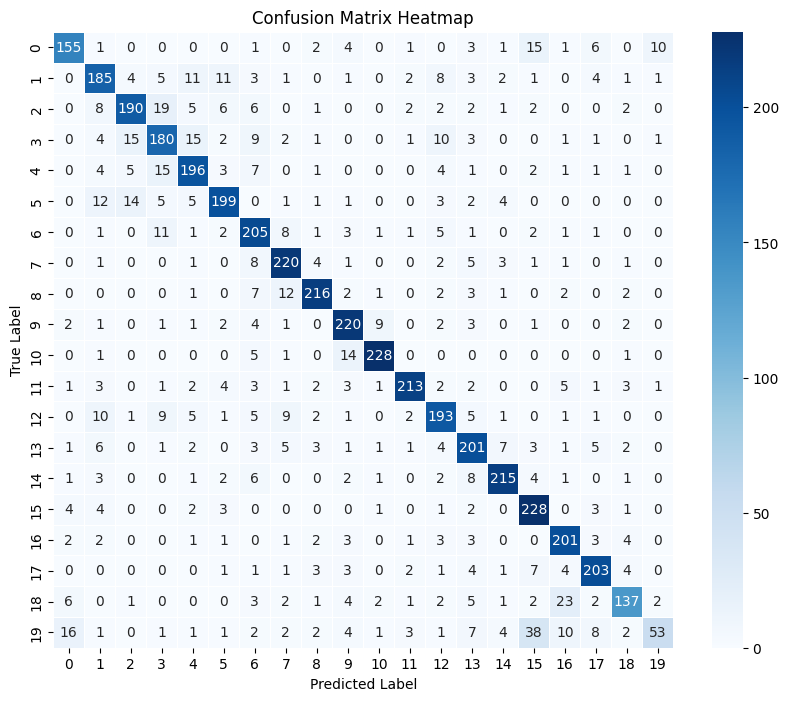

In [15]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')

model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Print out evaluation metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='macro')
print("Precision (macro) (scikit-learn):", precision_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='macro')
print("Recall (macro) (scikit-learn):", recall_sklearn)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sklearn, annot=True, cmap='Blues', fmt='g', cbar=True, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()